In [1]:
import os
import re
import jieba
import docx
import math
from nltk import FreqDist, word_tokenize
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 中文语料信息熵计算

In [2]:
# 1. 读取解压后的wiki_zh_2019数据
folder_path = 'data/wiki_zh'  # 请根据实际路径调整
corpus_parts = []

for childfolder in tqdm(os.listdir(folder_path), desc="Processing folders"):
    childfolder_path = os.path.join(folder_path, childfolder)
    if os.path.isdir(childfolder_path):
        for filename in os.listdir(childfolder_path):
            file_path = os.path.join(childfolder_path, filename)
            if os.path.isfile(file_path):
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        corpus_parts.append(file.read())
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

# 合并所有文本为一个大字符串
corpus = ''.join(corpus_parts)
print(f"Total corpus length: {len(corpus)} characters")

Processing folders: 100%|██████████| 13/13 [00:47<00:00,  3.67s/it]


Total corpus length: 565215433 characters


In [3]:
# 2. 提取中文字符
text_processed = re.sub(r'[^\u4e00-\u9fa5。，！？、；：“”‘’（）]', '', corpus)

In [ ]:
# 3. 分词
words = jieba.cut(text_processed, cut_all=False)
word_list = list(words)

print(f"Total words: {len(word_list)}")
print(f"Sample words: {word_list[:20]}")

Total words: 220299972
Sample words: ['数学', '数学', '数学', '是', '利用', '符号语言', '研究', '数量', '、', '结构', '、', '变化', '以及', '空间', '等', '概念', '的', '一门', '学科', '，']


In [ ]:
# 4. 计算词频
fdist = FreqDist(word_list)

In [29]:
# 5. 计算信息熵
def calculate_entropy(fdist):
    total = sum(fdist.values())
    entropy = 0
    for count in fdist.values():
        prob = count / total
        entropy -= prob * math.log2(prob)
    return entropy

In [30]:
# 6. 输出平均信息熵
# 计算每个词的信息熵
word_entropy = calculate_entropy(fdist)
print(f"词级别的平均信息熵: {word_entropy:.4f}")


词级别的平均信息熵: 12.1443


In [8]:
# 以字为单位的字频计算
char_list = list(text_processed)
char_freq = Counter(char_list)

In [9]:
# 计算字的总数
total_chars = sum(char_freq.values())

In [10]:
# 计算每个字的信息熵
char_entropy = calculate_entropy(char_freq)
print(f"字级别的平均信息熵: {char_entropy:.4f}")

字级别的平均信息熵: 9.5881


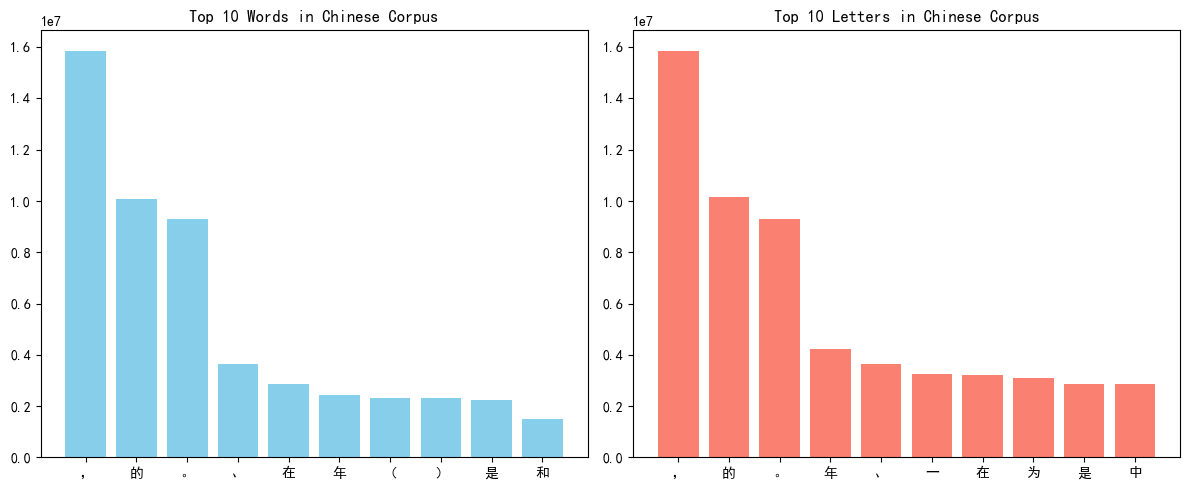

中文语料库单词级别的信息熵: 12.1443
中文语料库字母级别的信息熵: 9.5881


In [31]:
# 可视化
plt.figure(figsize=(12, 5))

# 单词频率可视化
top_words = fdist.most_common(10)
words, freqs = zip(*top_words)
plt.subplot(1, 2, 1)
plt.bar(words, freqs, color='skyblue')
plt.title('Top 10 Words in Chinese Corpus')

# 字母频率可视化
top_letters = char_freq.most_common(10)
letters, freqs = zip(*top_letters)
plt.subplot(1, 2, 2)
plt.bar(letters, freqs, color='salmon')
plt.title('Top 10 Letters in Chinese Corpus')

plt.tight_layout()
plt.show()

print(f'中文语料库单词级别的信息熵: {word_entropy:.4f}')
print(f'中文语料库字母级别的信息熵: {char_entropy:.4f}')

# 英文语料信息熵计算

In [12]:
# 1. 读取.docx文件并提取文本
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

# 2. 计算信息熵
def calculate_entropy(fdist):
    total = sum(fdist.values())
    entropy = 0
    for count in fdist.values():
        prob = count / total
        entropy -= prob * math.log2(prob)
    return entropy



In [13]:
# 3. 提取英文语料
file_path = 'data/Gutenberg Corpus.docx'
corpus = extract_text_from_docx(file_path)

In [14]:
# 单词级别处理
cleaned_corpus = re.sub(r'[^a-zA-Z\s]', '', corpus)
words = word_tokenize(cleaned_corpus.lower())
word_dist = FreqDist(words)
word_entropy = calculate_entropy(word_dist)

# 字母级别处理
letters = re.findall(r'[a-zA-Z]', corpus)
letter_dist = FreqDist(letters)
letter_entropy = calculate_entropy(letter_dist)

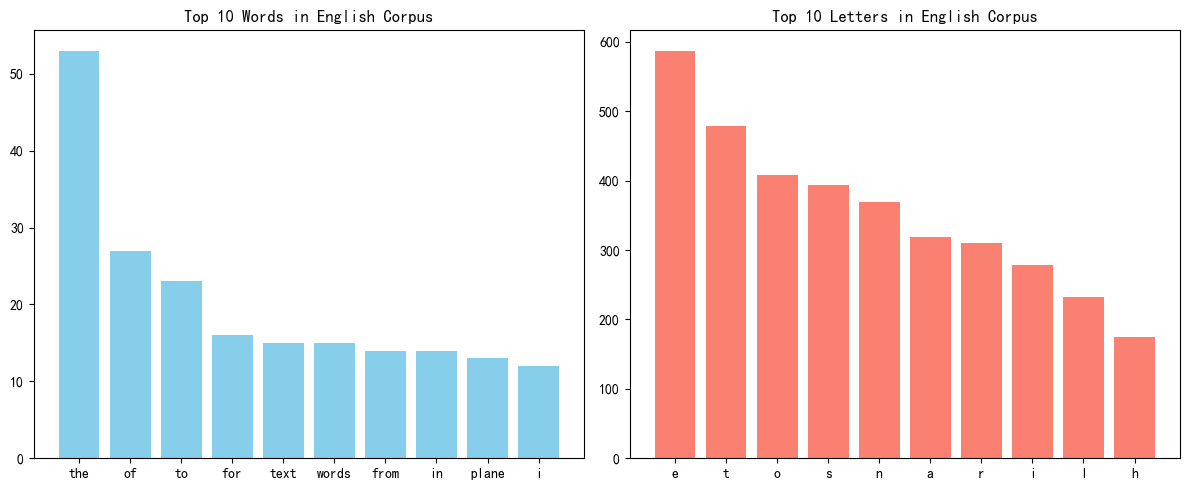

英文语料库单词级别的信息熵: 7.6777
英文语料库字母级别的信息熵: 4.3908


In [15]:
# 可视化
plt.figure(figsize=(12, 5))

# 单词频率可视化
top_words = word_dist.most_common(10)
words, freqs = zip(*top_words)
plt.subplot(1, 2, 1)
plt.bar(words, freqs, color='skyblue')
plt.title('Top 10 Words in English Corpus')

# 字母频率可视化
top_letters = letter_dist.most_common(10)
letters, freqs = zip(*top_letters)
plt.subplot(1, 2, 2)
plt.bar(letters, freqs, color='salmon')
plt.title('Top 10 Letters in English Corpus')

plt.tight_layout()
plt.show()

print(f'英文语料库单词级别的信息熵: {word_entropy:.4f}')
print(f'英文语料库字母级别的信息熵: {letter_entropy:.4f}')